In [3]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt

# loading the dataset
df = pd.read_csv("../datasets/AQI_dataset_Amartya/AQI.csv ", index_col = "_id")

                     site  index_value  air_score
5           Lawrenceville    37.337761  92.532448
9                 Lincoln    35.108002  92.978400
8               Liberty 2    31.923306  93.615339
1                Clairton    29.891662  94.021668
0                  Avalon    25.318297  94.936341
13          South Fayette    25.153913  94.969217
4       Harrison Township    25.018519  94.996296
12             Pittsburgh    24.700507  95.059899
11           Parkway East    21.508145  95.698371
10         North Braddock    19.170392  96.165922
7                 Liberty    17.541261  96.491748
3   Glassport High Street    17.317585  96.536483
2              Flag Plaza     9.949275  98.010145
14           West Mifflin     6.335548  98.732890
6         Lawrenceville 2     3.020402  99.395920


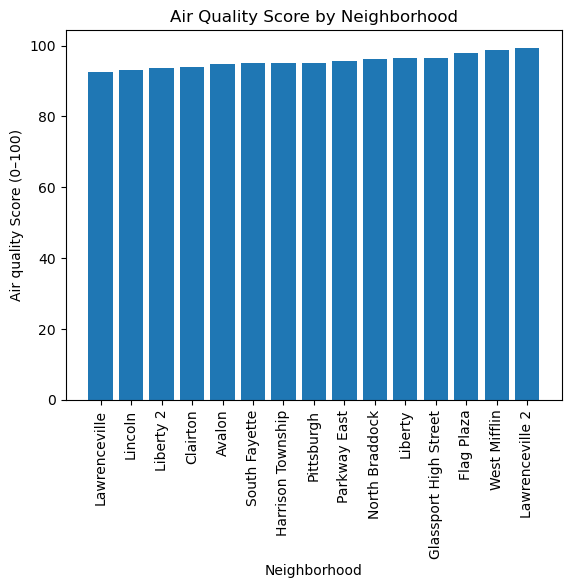

Best Neighborhood: Lawrenceville 2 with score: 99.3959195081051


In [4]:
#AQI ANALYSIS
#AUTHOR: AMARTYA CHAKRABORTY

#GOAL:
#assign each neighbourhood a score from 1 to 100 based on aqi index and then figure out the best neighbourhood

#Removing unrequired columns
df = df[["date", "site", "parameter", "index_value", "description"]]

#calculating the daily average aqi for each site
avg_aqi = df.groupby("site")["index_value"].mean().reset_index()

#scaling the aqi
#AQI is between 0-500. therefore first we calculate the fraction of aqi by dividing aqi by 500. 
#since higher scores are worse and lower scores are better, we substract from 1 to fix this issue
#lastly we convert to percentage between 1-100 by converting to pencentage
avg_aqi["air_score"] = (100 * (1 - avg_aqi["index_value"] / 500))

#finally we rank them one by one
rank = avg_aqi.sort_values(by="air_score")
print(rank)

# VISUALISATION USING MATPLOTLIB
#drawing the bar graph
plt.bar(rank["site"], rank["air_score"])
#labelling the axis
plt.xlabel("Neighborhood")
plt.ylabel("Air quality Score (0–100)")
#adding a title
plt.title("Air Quality Score by Neighborhood")
#the names of neighbourhood overlap horizonatally. fixing it by making them vertical
plt.xticks(rotation=90)
#showing the graph
plt.show()

# PRINTING THE CONCLUSION
best_neighbourhood = rank.iloc[-1]["site"]
best_score = rank.iloc[-1]["air_score"]
print("Best Neighborhood:",best_neighbourhood,"with score:",best_score)


In [ ]:
Big-Ideas-in-CS-Final-Project/notebooks/AQI_dataset_amartya.csv 